In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# ISOSTERIC HEAT OF ADSORPTION

Data obtained from **"A practical guide to calculate the isosteric heat/enthalpy of adsorption via adsorption isotherms in metal organic frameworks, MOFs**

DOI: 10.1039/D0DT01784A

In [2]:
df1 = pd.read_csv("iso_heat1.csv")
df2 = pd.read_csv("iso_heat2.csv")

In [3]:
x1 = df1["x"].values
y1 = df1["y"].values
T1 = 273.15
x2 = df2["x"].values
y2 = df2["y"].values
T2 = 293.15

### Langmuir-Freundlich equation

In [4]:
def lf(p, a, b, c):
    return a*b*p**c/(1+b*p**c)

In [5]:
params_273K, pcov_273K = curve_fit(lf, x1, y1, [1,1,1])

params_273K

array([5.93148122, 0.05028631, 1.05597616])

In [6]:
a_273K, b_273K, c_273K = params_273K

In [7]:
params_293K, pcov_293K = curve_fit(lf, x2, y2, [1,1,1])

params_293K

array([5.892741  , 0.01682416, 1.09518351])

In [8]:
a_293K, b_293K, c_293K = params_293K

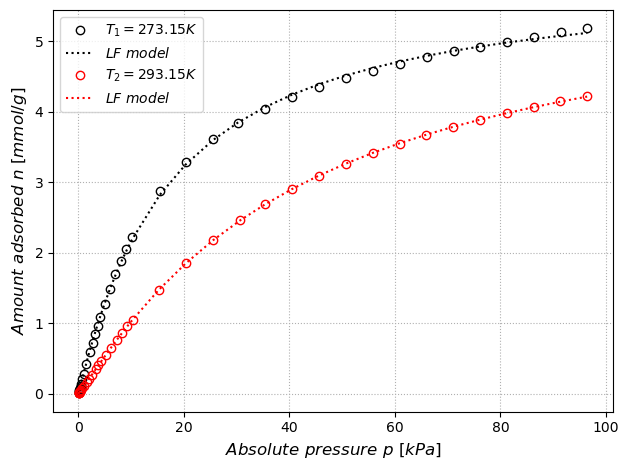

In [9]:
plt.plot(x1, y1, "ko", mfc="none", label = "$T_1={}K$".format(T1))
plt.plot(x1, lf(x1, *params_273K), "k:", label = "$LF~model$")

plt.plot(x2, y2, "ro", mfc="none", label = "$T_2={}K$".format(T2))
plt.plot(x2, lf(x2, *params_293K), "r:", label = "$LF~model$")

plt.xlabel("$Absolute~pressure~p~[kPa]$", fontsize=12)
plt.ylabel("$Amount~adsorbed~n~[mmol/g]$", fontsize=12)
plt.tight_layout()
plt.legend()
plt.grid(ls=":")

Afterwards one has to rearrange the Langmuir-Freundlich equation as follows in order to compare the pressures at isosteric conditions

$p(n)=(\frac{n}{a~b-n~b})^{1/c}$

In [10]:
def isosteric(n, a, b, c):
    n = np.array(n)
    return (n/(a*b-n*b))**(1/c)

In [11]:
if y1.max()>y2.max():
    nfit = np.linspace(min(y2)*10, max(y2))
else:
    nfit = np.linspace(min(y1)*10, max(y1))

In [12]:
nfit[0]

0.011000000000000001

In [13]:
pkPa_273K = isosteric(nfit, a_273K, b_273K, c_273K)
pkPa_273K

array([ 0.04400648,  0.35061173,  0.64863684,  0.94762103,  1.25031495,
        1.55821856,  1.87237382,  2.19361344,  2.52266544,  2.86020562,
        3.20688746,  3.56336093,  3.93028569,  4.30834093,  4.69823357,
        5.10070538,  5.51653972,  5.94656807,  6.39167683,  6.85281429,
        7.33099827,  7.82732427,  8.3429746 ,  8.87922844,  9.43747308,
       10.01921667, 10.62610257, 11.25992569, 11.92265115, 12.61643566,
       13.34365214, 14.10691815, 14.90912888, 15.7534956 , 16.64359057,
       17.58339989, 18.57738582, 19.63056077, 20.74857545, 21.93782463,
       23.20557451, 24.56011747, 26.0109608 , 27.56905897, 29.2471013 ,
       31.05987131, 33.02469942, 35.16203877, 37.49620499, 40.05633735])

In [14]:
pkPa_293K = isosteric(nfit, a_293K, b_293K, c_293K)
pkPa_293K

array([ 0.13454592,  0.99529576,  1.80136681,  2.59646383,  3.39234017,
        4.19497156,  5.0082098 ,  5.83491439,  6.67742234,  7.53777977,
        8.41787096,  9.31949717, 10.24442902, 11.19444397, 12.17135499,
       13.17703425, 14.21343377, 15.28260451, 16.38671499, 17.52806995,
       18.70912984, 19.93253153, 21.20111069, 22.51792645, 23.88628866,
       25.30978851, 26.79233292, 28.33818354, 29.95200129, 31.63889721,
       33.40449097, 35.25497856, 37.19721064, 39.23878394, 41.38814825,
       43.65473212, 46.04909142, 48.58308576, 51.27008904, 54.12524222,
       57.16575853, 60.4112943 , 63.88440272, 67.61109284, 71.62152373,
       75.95087358, 80.64043764, 85.73902882, 91.30478316, 97.40751427])

We are going to use Clausius-Clapeyron equation

$\Delta H_{ads}(n)=-R~ln(\frac{p_2}{p_1})\frac{T_1T_2}{T_2-T_1}$

In [15]:
iso_heat = -8.314*np.log(pkPa_293K/pkPa_273K)*T1*T2/(T2-T1)
iso_heat

array([-37200.20663276, -34730.0586984 , -33999.99797466, -33551.39456061,
       -33224.30090976, -32965.29093119, -32749.86370538, -32564.72170799,
       -32401.83449321, -32255.97803955, -32123.56188294, -32002.01138608,
       -31889.41693199, -31784.32258006, -31685.59252715, -31592.32334783,
       -31503.78438537, -31419.37610959, -31338.60031322, -31261.0383269 ,
       -31186.33479854, -31114.18541745, -31044.32748909, -30976.53260562,
       -30910.60088201, -30846.35637867, -30783.64343608, -30722.32371979,
       -30662.27382647, -30603.38333896, -30545.55324675, -30488.69466871,
       -30432.72783114, -30377.58126717, -30323.19121364, -30269.50119068,
       -30216.46175768, -30164.03044678, -30112.17188417, -30060.85811825,
       -30010.06918556, -29959.79395921, -29910.03134304, -29860.791899  ,
       -29812.10002865, -29763.9968755 , -29716.54417994, -29669.8294113 ,
       -29623.97263621, -29579.1357821 ])

In [16]:
dH_kJ_mol = -iso_heat/1000
dH_kJ_mol

array([37.20020663, 34.7300587 , 33.99999797, 33.55139456, 33.22430091,
       32.96529093, 32.74986371, 32.56472171, 32.40183449, 32.25597804,
       32.12356188, 32.00201139, 31.88941693, 31.78432258, 31.68559253,
       31.59232335, 31.50378439, 31.41937611, 31.33860031, 31.26103833,
       31.1863348 , 31.11418542, 31.04432749, 30.97653261, 30.91060088,
       30.84635638, 30.78364344, 30.72232372, 30.66227383, 30.60338334,
       30.54555325, 30.48869467, 30.43272783, 30.37758127, 30.32319121,
       30.26950119, 30.21646176, 30.16403045, 30.11217188, 30.06085812,
       30.01006919, 29.95979396, 29.91003134, 29.8607919 , 29.81210003,
       29.76399688, 29.71654418, 29.66982941, 29.62397264, 29.57913578])

(0.0, 5.0)

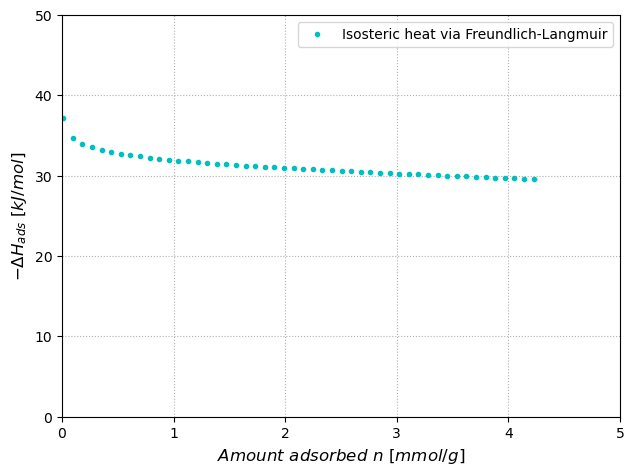

In [17]:
plt.plot(nfit, abs(dH_kJ_mol), 'c.', label = "Isosteric heat via Freundlich-Langmuir")
plt.ylabel("$-ΔH_{ads}~[kJ/mol]$", fontsize=12)
plt.xlabel("$Amount~adsorbed~n~[mmol/g]$", fontsize=12)
plt.tight_layout()
plt.legend()
plt.grid(ls=":")
plt.ylim(0, 50)
plt.xlim(0, 5)